# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Rifdah Hansya Rofifah
- **Email:** rifdahiparifdah@gmail.com
- **ID Dicoding:** rifdahhr

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?
- Bagaimana perbandingan tren penyewaan sepeda setiap bulan antara tahun 2011 dan 2012?
- Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?
- Kapan jam paling ramai dan paling sepi untuk penyewaan sepeda?
- Bagaimana pengaruh musim (season) terhadap penyewaan sepeda?
- Bagaimana pola penyewaan sepeda (ramai, sedang, atau sepi) berdasarkan minggu dalam tahun tersebut (2011 hingga 2012)?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Pada tahap ini dilakukan pengumpulan beberapa dataframe yang akan digunakan untuk proses analisis data. Pada kasus ini, akan ada dua dataframe yang digunakan yaitu day_df dan hour_df.

day_df merupakan dataframe yang berisi jumlah penyewaan sepeda perhari. Sedangkan hour_df merupakan dataframe yang berisi jumlah penyewaan sepeda perjam.

In [3]:
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Data Submission Dicoding/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis Data Submission Dicoding/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Penjelasan Dataset:**

Dataset ini bersi data terkait penggunaan sepeda sewa.

- instant: nomor indeks rekaman data
- dteday: tanggal pencatatan
- season: musim (1:spring, 2:summer, 3:fall, 4:winter)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan dalam setahun (1 sampai 12)
- hr: hour (0 sampai 23)
- holiday: apakah hari tersebut hari holiday
- weekday: hari weekday (biasanya senin sampai jumat)
- workingday: hari kerja, jika bukan hari kerja (akhir pekan/libur) maka nilainya 0
- weathersit: kondisi cuaca saat data dicatat

  1: Clear, Few clouds, Partly cloudy, Partly cloudy

	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp: suhu yang sudah dinormalisasi (asalnya dalam satuan Celcius)
- atemp: suhu yang dirasakan (feels-like temperature) yang sudah dinormalisasi
- hum: kelembaban udara dalam skala 0-1
- windspeed: kecepatan angin skala 0-1
- casual: jumlah pengguna yg tidak terdaftar
- registered: jumlah pengguna yg terdaftar
- cnt: total jumlah peminjaman (casual + registered)

**Insight:**
- dataset tersebut terdiri dari 2 dataframe yaitu day_df dan hour_df, perbedaan dari kedua dataframe tersebut adalah terdapat kolom hr pada dataframe hour_df

### Assessing Data

#### Menilai data day_df

In [5]:
# cek informasi umum tentang day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


kolom dteday seharusnya memiliki tipe data **datetime**, bukan object

In [6]:
# cek missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tidak ditemukan missing value pada day_df

In [7]:
# Cek data duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada data duplikasi pada day_df

In [8]:
# lihat ringkasan statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ditemukan keanehan dalam ringkasan parameter statistik dari day_df



#### Menilai data hour_df

In [9]:
# cek informasi umum tentang hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kolom dteday seharusnya memiliki tipe data **datetime**, bukan object

In [10]:
# cek missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


tidak ditemukan missing value pada hour_df

In [11]:
# Cek data duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada data duplikasi pada hour_df

In [12]:
# lihat ringkasan statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ditemukan keanehan dalam ringkasan parameter statistik dari hour_df

**Insight:**
- ada kolom yang perlu diubah tipe datanya yaitu kolom dteday, asalnya bertipe data object harusnya diubah ke datetime
- tidak ditemukan missing value, data duplikat, dan keanehan di ringkasan parameter statistik pada day_df maupun hour_df

### Cleaning Data

In [13]:
# ubah tipe data kolom dteday di hour_df dan day_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [14]:
# cek lagi setelah diubah tipe datanya
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
# cek lagi setelah diubah tipe datanya
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Cleaning data dilakukan hanya dengan mengubah tipe data pada kolom dteday di hour_df maupun di day_df

## Exploratory Data Analysis (EDA)

### Explore Data day_df



In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


- Dataset mencakup 731 hari yang mencakup dua tahun (1 januari 2011 - 31 desember 2012)
- Ada koom NaN di dteday karena kolom tersebut berupa kolom tanggal

In [17]:
# lihat pelanggan apakah didominasi oleh pelanggan casual atau registered
casual = day_df["casual"].sum()
registered = day_df["registered"].sum()
print(f"Jumlah pelanggan casual: {casual}")
print(f"Jumlah pelanggan registered: {registered}")

Jumlah pelanggan casual: 620017
Jumlah pelanggan registered: 2672662


Dapat disimpulkan bahwa jumlah pelanggan registered lebih banyak daripada jumlah pelanggan casual.

In [18]:
# melihat persebaran jumlah pelanggan berdasarkan season
customer_by_season = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)
customer_by_season

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


Pelanggan terbanyak ada pada season 3 (fall) dan tersedikit ada di season 1 (spring)

In [19]:
# melihat persebaran jumlah pelanggan berdasarkan hari
customer_by_weekday = day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)
customer_by_weekday

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


Penyewa sepeda kebanyakan ada di hari Sabtu, Jum'at, dan Minggu. Sedangkan paling sedikit ada di hari Senin.

In [20]:
# melihat persebaran jumlah pelanggan berdasarkan workingday
customer_by_workingday = day_df.groupby('workingday')['cnt'].sum().sort_values(ascending=False)
customer_by_workingday

,cnt
workingday,
1,2292410
0,1000269


dapat disimpulkan bahwa penyewa sepeda paling banyak di bukan hari kerja.

In [21]:
# melihat persebaran jumlah pelanggan berdasarkan weathersit
customer_by_weathersit = day_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)
customer_by_weathersit

,cnt
weathersit,
1,2257952
2,996858
3,37869


Penyewa sepeda paling banyak ketika cuaca cerah (weathersit=1) dan tidak ada penyewa sepeda pada saat cuaca hujan lebat (weathersit=4)

### Explore Data hour_df



In [22]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


- Dataset berisi 17.379 baris data yang mencatat penggunaan sepeda per jam
- Periode dicatat dari tanggal 1 januari 2011 hingga 31 desember 2012

In [23]:
# melihat pola penyewaan sepeda berdasarkan jam menggunakan fungsi mean
customer_by_hour = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print(customer_by_hour)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64


Jumlah penyewa sepeda terbanyak ada pada jam 5-6 sore, sedangkan jumlah penyewa tersedikit ada di jam 3-4 dini hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?

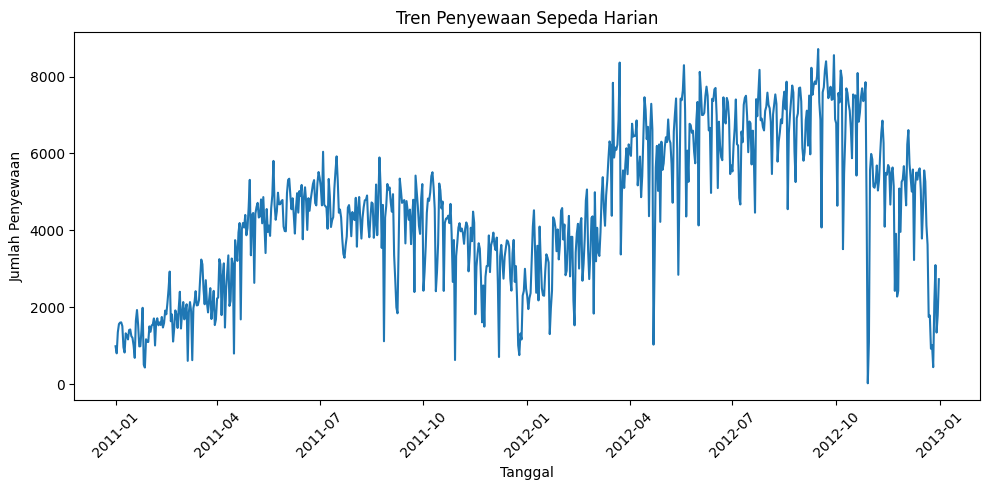

In [24]:
# visualisasi penyewaan sepeda harian
plt.figure(figsize=(10, 5))
sns.lineplot(x='dteday', y='cnt', data=day_df)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.title("Tren Penyewaan Sepeda Harian")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana perbandingan tren penyewaan sepeda setiap bulan antara tahun 2011 dan 2012?

In [25]:
# buat group untuk mengelompokkan jumlah penyewaan sepeda berdasarkan tahun dan bulan
monthly_trend = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
monthly_trend['yr'] = monthly_trend['yr'].map({0: 2011, 1: 2012})
pivot_trend = monthly_trend.pivot(index='mnth', columns='yr', values='cnt')

print(pivot_trend)

yr      2011    2012
mnth                
1      38189   96744
2      48215  103137
3      64045  164875
4      94870  174224
5     135821  195865
6     143512  202830
7     141341  203607
8     136691  214503
9     127418  218573
10    123511  198841
11    102167  152664
12     87323  123713


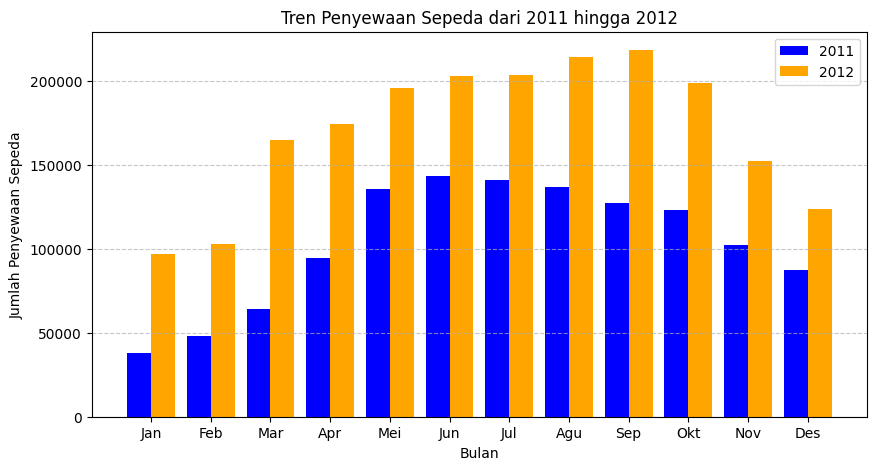

In [26]:
# Buat visualisasi menggunakan clustered bar chart
bar_width = 0.4
x_indexes = np.arange(len(pivot_trend.index))

plt.figure(figsize=(10, 5))
plt.bar(x_indexes - bar_width/2, pivot_trend[2011], width=bar_width, label='2011', color='blue')
plt.bar(x_indexes + bar_width/2, pivot_trend[2012], width=bar_width, label='2012', color='orange')

plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda dari 2011 hingga 2012")
plt.xticks(x_indexes, ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Penyewaan sepeda mengalami peningkatan dari tahun 2011 ke 2012 pada setiap bulannya.

### Pertanyaan 3: Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?

In [27]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah penyewaan sepeda
weather_rentals = day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
print(weather_rentals)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


<ipython-input-28-499c35e30d34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-28-499c35e30d34>:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


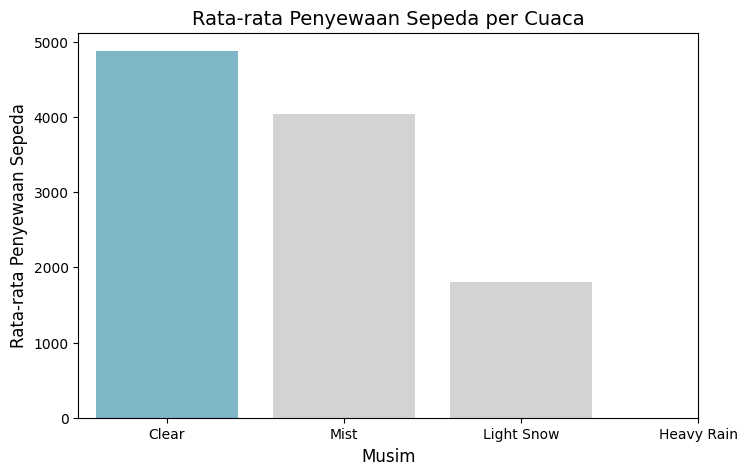

In [28]:
# bar chart untuk visualisasi per cuaca
plt.figure(figsize=(8,5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3",  "#D3D3D3"]

sns.barplot(
    x=weather_rentals.index,
    y=weather_rentals.values,
    palette=colors_
    )

plt.title('Rata-rata Penyewaan Sepeda per Cuaca', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(ticks=[0,1,2,3], labels=['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
plt.show()

### Pertanyaan 4: Kapan jam paling ramai dan paling sepi untuk penyewaan sepeda?

In [29]:
# kelompokkan data berdasarkan jam dan hitung rata-rata jumlah penyewaan sepeda
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()
print(hourly_rentals.sort_values(ascending=False))

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64


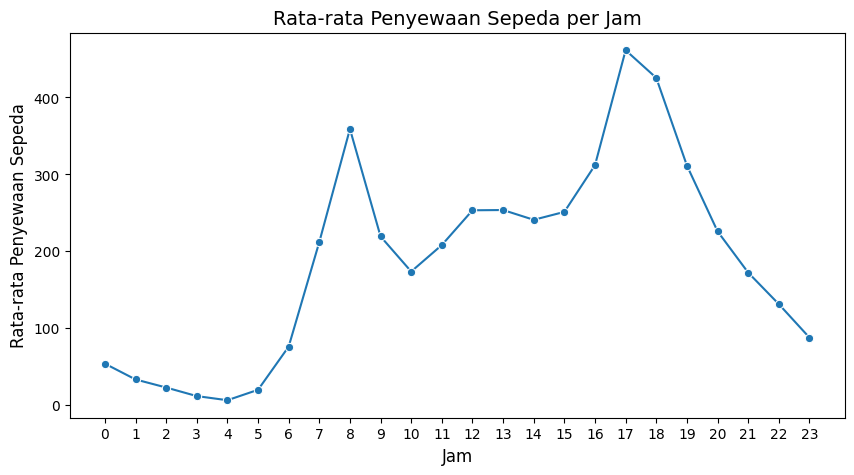

In [30]:
# Buat visualisasi dengan menggunakan line chart
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o', linestyle='-')

plt.title('Rata-rata Penyewaan Sepeda per Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

Jumlah penyewaan sepeda tertinggi terjadi pada pukul 5-6 sore, sementara jumlah penyewaan terendah tercatat pada pukul 3-4 dini hari.

### Pertanyaan 5: Bagaimana pengaruh musim terhadap penyewaan sepeda?

In [31]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah penyewaan sepeda
seasonal_rentals = day_df.groupby('season')['cnt'].mean().sort_values(ascending=False)
print(seasonal_rentals)

season
3    5644.303191
2    4992.331522
4    4728.162921
1    2604.132597
Name: cnt, dtype: float64


Berdasarkan hasil rata-rata penyewaan sepeda, jumlah penyewaan tertinggi terjadi saat cuaca cerah (weathersit = 1), sementara pada kondisi hujan lebat (weathersit = 4), tidak ada penyewaan sepeda.

<ipython-input-32-61ea01259d1f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


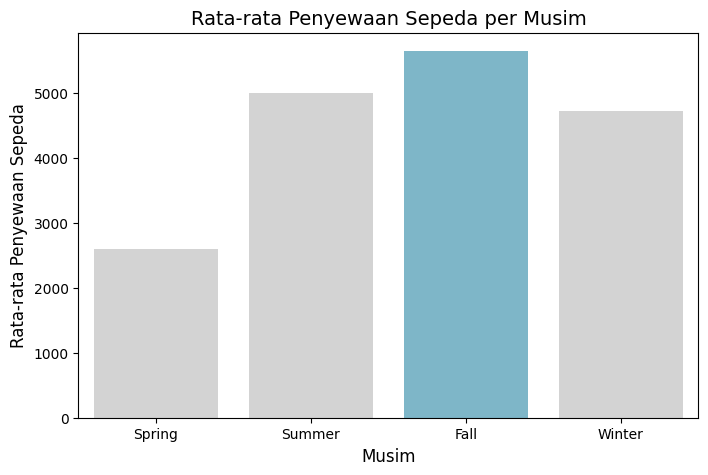

In [32]:
# Membuat bar chart untuk visualisasi per musim
plt.figure(figsize=(8,5))
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    x=seasonal_rentals.index,
    y=seasonal_rentals.values,
    palette=colors_
    )

# Menambahkan judul dan label
plt.title('Rata-rata Penyewaan Sepeda per Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(ticks=[0,1,2,3], labels=['Spring', 'Summer', 'Fall', 'Winter'])  # Ubah label musim

# Menampilkan plot
plt.show()

Musim gugur memiliki jumlah penyewaan tertinggi dengan rata-rata 5.644 penyewaan per hari. Sedangkan pada musim semi memiliki rata-rata penyewaan terendah, yaitu sekitar 2.604 penyewaan perhari.

Terdapat variasi yang signifikan dalam pola penyewaan sepeda antar musim. Musim memiliki pengaruh terhadap penyewaan sepeda, di mana musim-musim dengan cuaca yang lebih stabil seperti musim gugur dan musim panas memiliki tingkat penyewaan yang lebih tinggi.

## Analisis Lanjutan (Opsional) Clustering Binning

### Pertanyaan 6: Bagaimana pola penyewaan sepeda (ramai, sedang, atau sepi) berdasarkan minggu dalam tahun tersebut (2011 hingga 2012)?

Untuk menjawab pertanyaan tersebut perlu dilakukan clustering yang mengelompokkan banyaknya penyewa sepeda (cnt) berdasarkan kategori ramai, sedang, atau sepi. Clustering dilakukan dengan menggunakan teknik binning dan menggunakan fungsi pd.cut().

In [33]:
# buat kolom year yang berisi (2011 dan 2012) dan jumlah week selama 2 tahun dari steday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year
day_df['week'] = day_df['dteday'].dt.isocalendar().week

weekly_df = day_df.groupby(['year', 'week'])['cnt'].sum().reset_index()

bin_edges = [weekly_df['cnt'].min(), weekly_df['cnt'].quantile(0.33), weekly_df['cnt'].quantile(0.66), weekly_df['cnt'].max()] # batas clustering
bin_labels = ['Sepi', 'Sedang', 'Ramai']

weekly_df['category'] = pd.cut(weekly_df['cnt'], bins=bin_edges, labels=bin_labels, include_lowest=True) # kategori

print(weekly_df.head(10))


   year  week    cnt category
0  2011     1   9408     Sepi
1  2011     2   9025     Sepi
2  2011     3   8770     Sepi
3  2011     4   7699     Sepi
4  2011     5  10273     Sepi
5  2011     6  11192     Sepi
6  2011     7  14692     Sepi
7  2011     8  12113     Sepi
8  2011     9  11742     Sepi
9  2011    10  13045     Sepi


In [34]:
# tampilkan 10 hasil terbawah
print(weekly_df.tail(10))

     year  week    cnt category
94   2012    43  49331    Ramai
95   2012    44  28762   Sedang
96   2012    45  40675    Ramai
97   2012    46  37299    Ramai
98   2012    47  27315   Sedang
99   2012    48  35137   Sedang
100  2012    49  37762    Ramai
101  2012    50  35966   Sedang
102  2012    51  26696   Sedang
103  2012    52  13014     Sepi


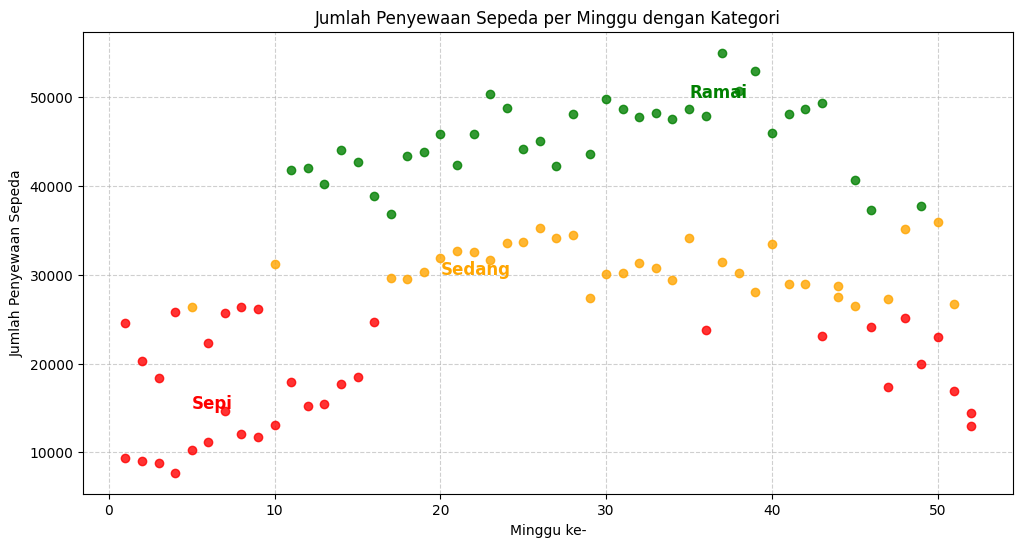

In [35]:
# custom warna untuk setiap kategori
colors = {'Sepi': 'red', 'Sedang': 'orange', 'Ramai': 'green'}

# visualisasi line plot
plt.figure(figsize=(12, 6))

for year in weekly_df['year'].unique():
    subset = weekly_df[weekly_df['year'] == year]

    for i in range(len(subset)):
        plt.plot(subset.iloc[i]['week'], subset.iloc[i]['cnt'],
                 marker='o', linestyle='-', color=colors[subset.iloc[i]['category']], alpha=0.8)

plt.text(5, 15000, 'Sepi', color='red', fontsize=12, fontweight='bold')
plt.text(20, 30000, 'Sedang', color='orange', fontsize=12, fontweight='bold')
plt.text(35, 50000, 'Ramai', color='green', fontsize=12, fontweight='bold')

plt.title('Jumlah Penyewaan Sepeda per Minggu dengan Kategori')
plt.xlabel('Minggu ke-')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


- Kelompok merah menandakan bahwa jumlah peyewaan sepeda tergolong sepi. Jumlah penyewa mencapai 10.000-25.000 ribu per minggu. Biasanya terjadi di awal dan akhir metode pengamatan
- Kelompok kuning menandakan bahwa jumlah penyewaan sepeda sedang, berkisar antara 25.000-35.000 per minggu.
- Kelompok hijau menandakan jumlah penyewaan sepeda ramai, berkisar 40.000-55.000 penyewaan per minggu. Terjadi di pertengahan periode.

Penyewaan sepeda cenderung meningkat setelah minggu ke-10 dan mencapai puncaknya dari minggu ke-30 hingga ke-40.
Setelah minggu ke-40 terjadi penurunan jumlah penyewaan, kembali ke kategori rendah.
Terdapat pola dalam penyewaan sepeda, yaitu ketika periode puncak di pertengahan tahun dan penurunan di awal serta akhir tahun.

## Conclusion

- Tren penyewaan sepeda dari tahun 2011 sampai 2012 mengalami peningkatan pada setiap bulannya
- Kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Pengguna sepeda cenderung lebih aktif saat cuaca mendukung, sedangkan dalam kondisi hujan atau salju, mereka lebih memilih untuk tidak menyewa sepeda.
- Jam paling ramai untuk penyewaan sepeda terjadi pada puku 5-6 sore, sedangkan jam paling sepi terjadi pukul 3-4 dini hari.
-  Musim memiliki pengaruh terhadap penyewaan sepeda, di mana musim-musim dengan cuaca yang lebih stabil seperti musim gugur dan musim panas memiliki tingkat penyewaan yang lebih tinggi.
- Pola penyewaan sepeda menunjukkan tren musiman, dengan jumlah penyewaan sepi di awal dan akhir tahun, meningkat ke tingkat sedang di pertengahan periode, dan ramai di tengah tahun sebelum kembali menurun.